<span style ="color:Purple"> <font size="5">Introduction</span>

<span style ="color:Brown">Potential Customers - Travelers wanting to insure themselves against travel related risks. </span>

<span style ="color:Brown">Offerings - 1-way travel insurance, 2-way insurance, insurance against cancellations, renting vehicles insurance, etc.</span>

 <span style ="color:Purple"> <font size="5">Problem Statement</span>

<span style ="color:Brown">Building an ML model to predict whether the customer will apply for the claim or not</span>


 <span style ="color:Purple"> <font size="5">Core Business Problem being solved?</span>


<span style ="color:Brown"> Building an ML model to predict whether the customer will apply for the claim or not</span>

<span style ="color:Brown"> Predicting the claims need less lead time and operational costs</span>


In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the dataset
df_travel = pd.read_csv('Travel.csv')
df_travel.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
df_travel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [5]:
df_travel.rename(columns={ 'Agency Type':'AgencyType', 'Distribution Channel':'DistChannel', 'Product Name':'ProdName',
                   'Net Sales':'NetSales', 'Commision (in value)':'Commission'},inplace=True)

In [6]:
df_travel.isnull().sum().any

<bound method NDFrame._add_numeric_operations.<locals>.any of Agency             0
AgencyType         0
DistChannel        0
ProdName           0
Claim              0
Duration           0
Destination        0
NetSales           0
Commission         0
Gender         45107
Age                0
dtype: int64>

## Check for Duplicates


In [7]:
df_travel.isna().sum()

Agency             0
AgencyType         0
DistChannel        0
ProdName           0
Claim              0
Duration           0
Destination        0
NetSales           0
Commission         0
Gender         45107
Age                0
dtype: int64

In [8]:
#check if data have any duplicate

df_travel.duplicated().sum()
df_travel.drop_duplicates()

8042

,Agency,AgencyType,DistChannel,ProdName,Claim,Duration,Destination,NetSales,Commission,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63320,JZI,Airlines,Online,Basic Plan,No,5,BRUNEI DARUSSALAM,18.0,6.30,M,27
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57


## Exploring the data visually

In [9]:
df1 = df_travel.iloc[:,:50]
df2 = df_travel.iloc[:,50:100]

array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'NetSales'}>],
       [<AxesSubplot:title={'center':'Commission'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

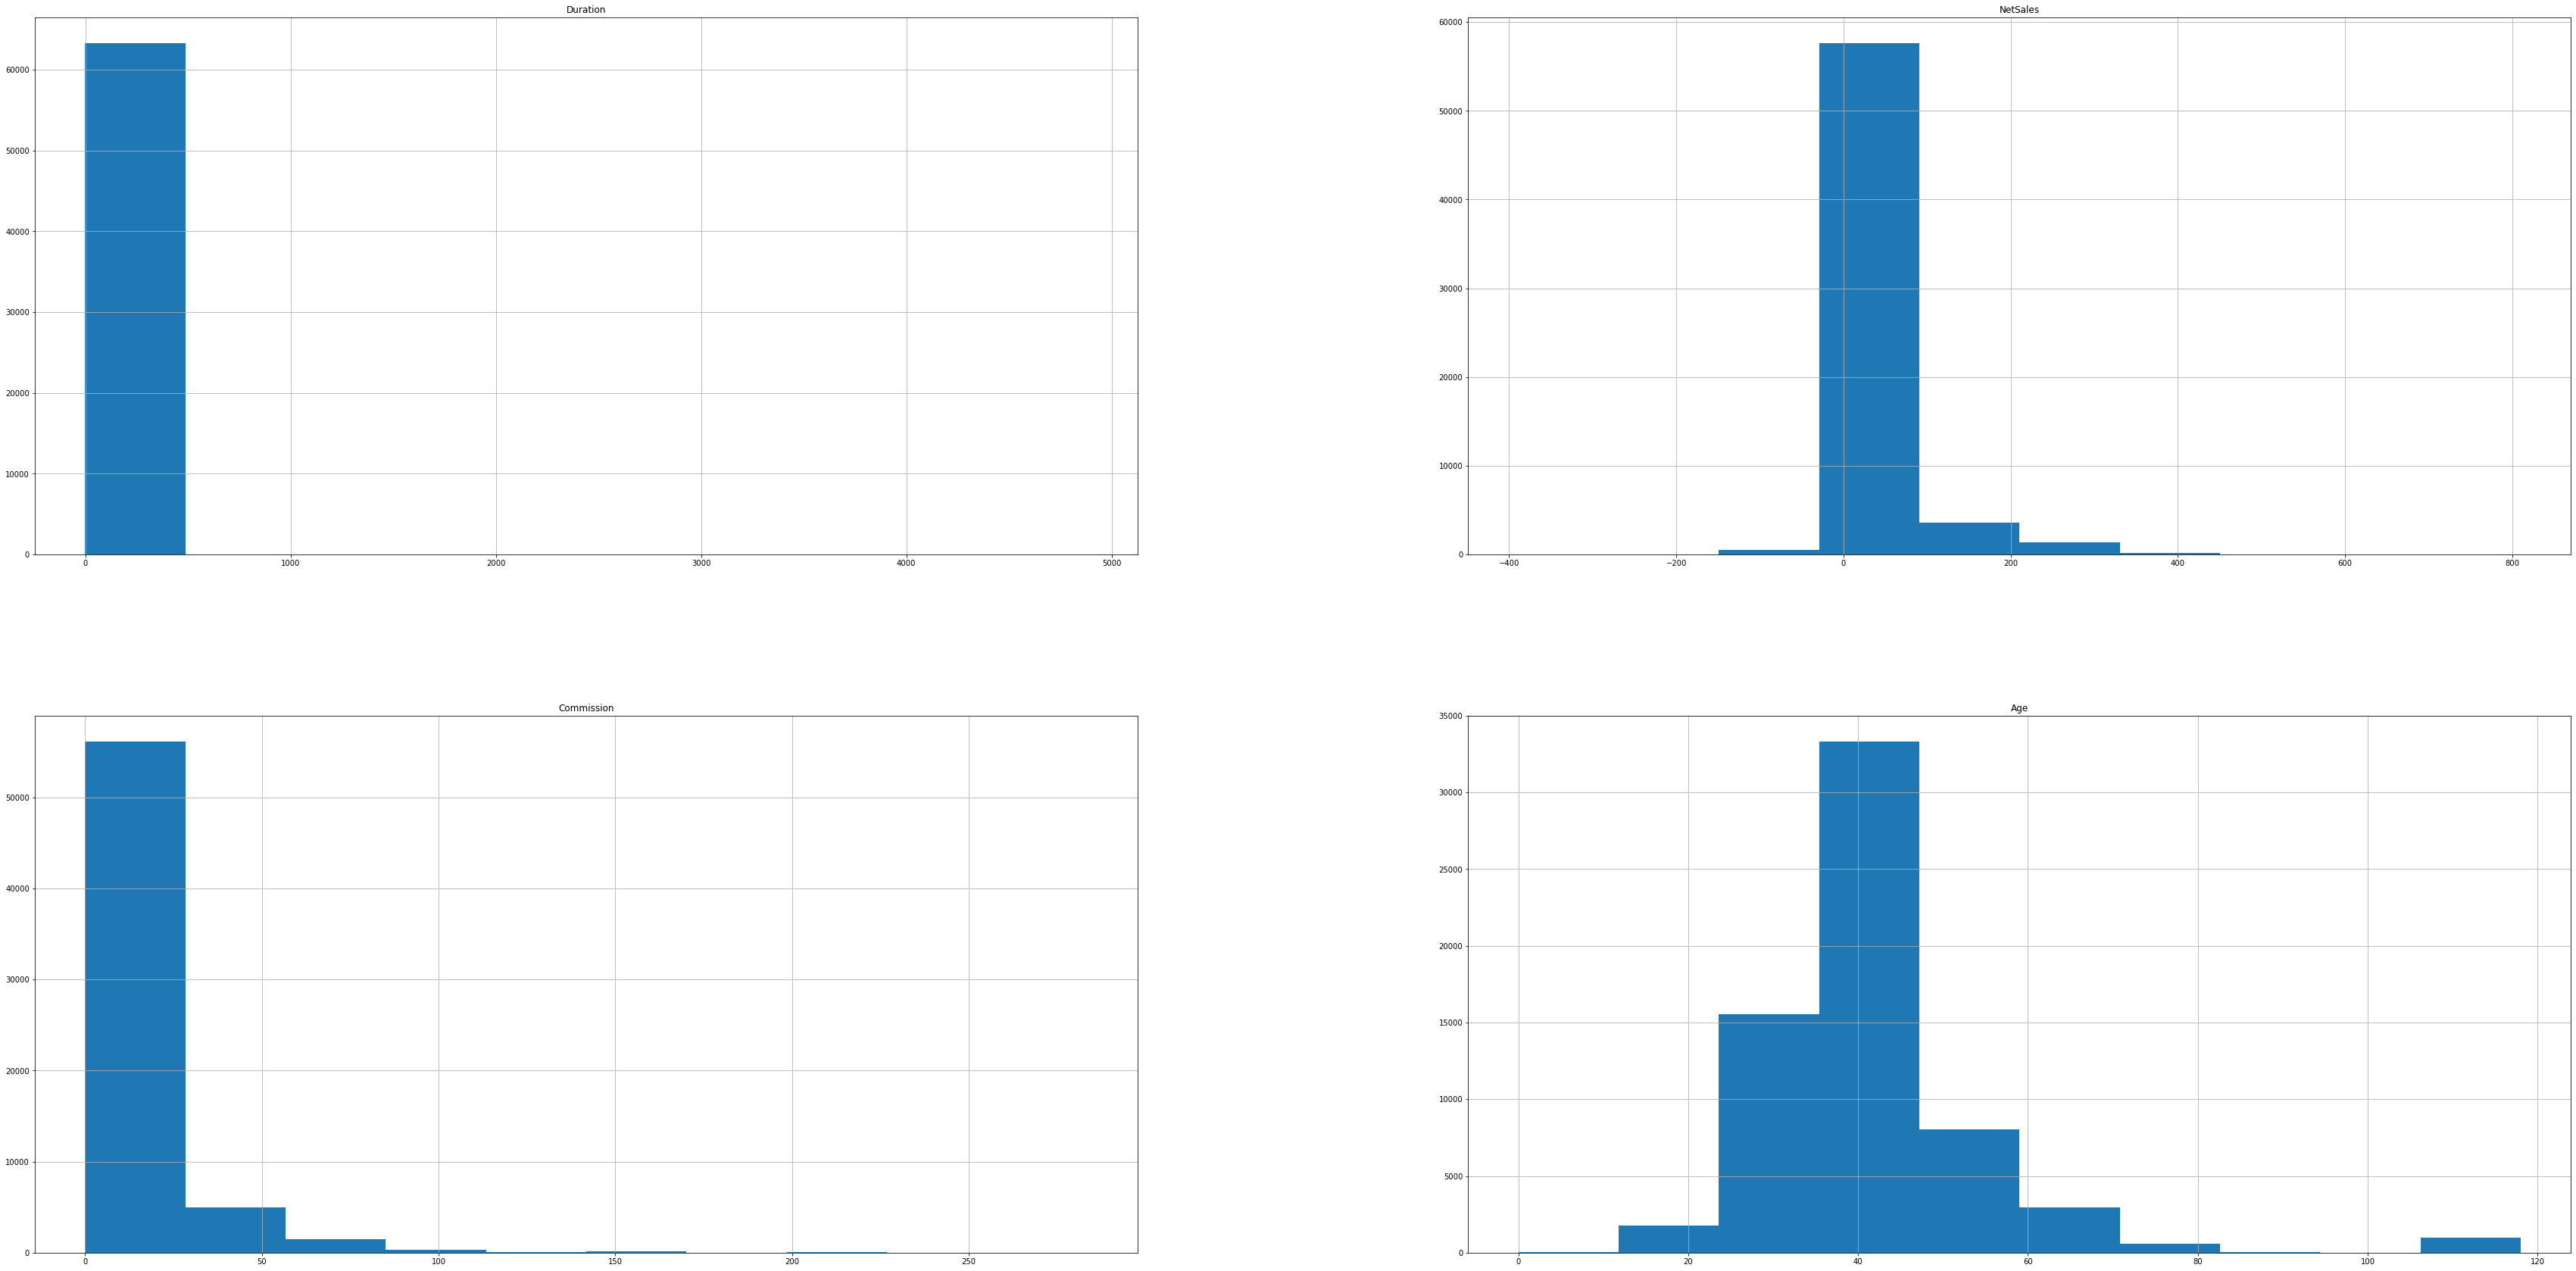

In [10]:
df1.hist(figsize= (60,30))
# double click histogram for zooming into details

 # Exploratory Data Analysis (EDA)

<span style ="color:Purple"> <font size="5">To check the number of claims </span>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Claim')

Text(0, 0.5, 'Number of people insured')

Text(0.5, 1.0, 'People Insured who requested for claim vs who did not')

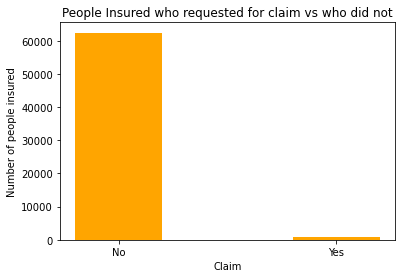

No     62399
Yes      927
Name: Claim, dtype: int64

No     62399
Yes      927
Name: Claim, dtype: int64
Percentage of claims that are Yes:  1.46%
Percentage of claims that are NO:  98.54%


In [11]:
df_claims = df_travel.groupby(by=["Claim"]).size().reset_index(name="counts")
plt.bar(df_claims['Claim'], df_claims['counts'], color ='orange',width = 0.4)
plt.xlabel("Claim")
plt.ylabel("Number of people insured")
plt.title("People Insured who requested for claim vs who did not")
plt.show()

 # To get the number of people who claim and did not claim
results = df_travel["Claim"].value_counts(dropna=False)
results
print(results)

#Finding the percentage of claims are yes
yes=results[1]/(results[0] + results[1])
#Rounding off to  2 decimal point
a_number = yes
percentage = "{:.2%}".format(yes)
print('Percentage of claims that are Yes: ' ,percentage)

#Finding the percentage of claims are NO
No=results[0]/(results[0] + results[1])
#Rounding off to  2 decimal point
a_number = No
percentages = "{:.2%}".format(No)
print('Percentage of claims that are NO: ' ,percentages)

<span style ="color:Purple"> <font size="5">Claim Rate vs Agency Type </span>

<Figure size 720x576 with 0 Axes>

Text(-0.25, 97.1145385805121, '96.61%')

Text(0.75, 99.76747912533519, '99.27%')

Text(0.0, 3.8854614194878847, '3.39%')

Text(1.0, 1.2325208746648062, '0.73%')

Text(0, 0.5, 'Claim Rate')

Text(0.5, 1.0, 'Claim Rate as per Agency Type')

(0.0, 100.0)

<Figure size 720x576 with 0 Axes>

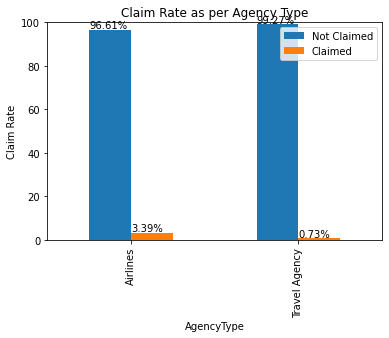

In [12]:
#plotting the graph fpr claim rate vs Agency Type
plt.figure(figsize=(10,8))
cla_agencytype = pd.DataFrame(df_travel.groupby(['AgencyType'])['Claim'].value_counts(normalize=True)*100) #converting claim counts grouped by agency type to percentage
cla_agencytype.columns = ['Claim_Rate']  #replacing the claim colum with claim rate
ax = cla_agencytype.unstack().plot(kind = 'bar')

for i in ax.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    ax.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.ylabel("Claim Rate")
plt.title("Claim Rate as per Agency Type")
plt.legend(['Not Claimed', 'Claimed'], loc = 'upper right')
plt.ylim(0,100)
plt.show()

<u>Findings:</u>

<span style ="color:Brown"> Airlines have higher claim rate whereas more than 90% of insurances in train agency are not claimed. </span>
 

<span style ="color:Purple"> <font size="5">Top 5 agencies having better claim rate</span>


([<matplotlib.patches.Wedge at 0x21ba92a76a0>,
 [Text(-0.3764238151970206, 1.0335884632446897, 'C2B'),
  Text(-0.20536066433281652, -1.080660445072727, 'EPX'),
  Text(0.7879883784327603, -0.7675117689357664, 'CWT'),
  Text(1.0355561761408305, -0.37097628772818, 'LWC'),
  Text(1.0934940604506507, -0.11946020157001701, 'JZI')],
 [Text(-0.20532208101655666, 0.5637755254061944, '61.1%'),
  Text(-0.11201490781789991, -0.589451151857851, '21.8%'),
  Text(0.4298118427815055, -0.41864278305587255, '9.6%'),
  Text(0.5648488233495439, -0.20235070239718908, '4.0%'),
  Text(0.5964513057003548, -0.065160109947282, '3.5%')])

Text(0.5, 1.0, 'Top 5 Agencies where insured are raising claim requests')

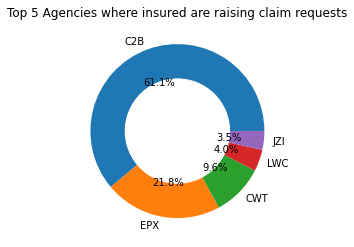

In [13]:
df5=df_travel.loc[df_travel['Claim']=='Yes']
df10= df5.groupby(by=["Agency"]).size().reset_index(name="counts")
df11=df10.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df11['counts'], labels=df11['Agency'], autopct='%1.1f%%')
plt.title('Top 5 Agencies where insured are raising claim requests')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<u>Findings:</u>

<span style ="color:Brown">The top agency is C2B with 61.1% of people who insured claim requests as compared to other agency. </span>

<span style ="color:Purple"> <font size="5">Claim Rate vs Agency</span>

Text(-0.25, 0.5, '0.0%')

Text(0.75, 93.8833313172856, '93.38%')

Text(1.75, 99.50990099009901, '99.01%')

Text(2.75, 98.9536082474227, '98.45%')

Text(3.75, 99.33720930232558, '98.84%')

Text(4.75, 99.497668997669, '99.0%')

Text(0.0, 0.8021148036253776, '0.3%')

Text(1.0, 7.116668682714407, '6.62%')

Text(2.0, 1.49009900990099, '0.99%')

Text(3.0, 2.0463917525773194, '1.55%')

Text(4.0, 1.6627906976744187, '1.16%')

Text(5.0, 0.5, '0.0%')

Text(0, 0.5, 'Claim Rate')

Text(0.5, 1.0, 'Claim Rate as per Agency')

(0.0, 140.0)

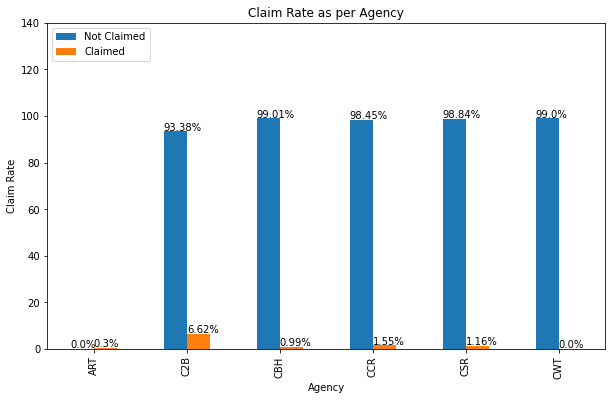

In [14]:
cla_agency = pd.DataFrame(df_travel.groupby(['Agency'])['Claim'].value_counts(normalize = True)*100)[2:12] 
#converting claim counts grouped by agency type to percentage
cla_agency.columns = ['Claim_Rate']
ax = cla_agency.unstack().plot(kind ='bar',figsize =(10,6))

for i in ax.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    ax.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.ylabel("Claim Rate")
plt.title("Claim Rate as per Agency")
plt.legend(['Not Claimed', 'Claimed'], loc = 'upper left')
plt.ylim(0,140)
plt.show()

<u>Findings:</u>

<span style ="color:Brown">According to the chart, CWT has the highest unlclaim rate of 99.0%. </span>
    


<span style ="color:Purple"> <font size="5">Finding claim percentage for each Product </span>

In [15]:
plt.figure(figsize=(10,8))
#Product Name with claims count and percentage
pc_counts = pd.DataFrame(df_travel.groupby(["ProdName"])["Claim"].value_counts())
pc_percent = pd.DataFrame(df_travel.groupby(["ProdName"])["Claim"].value_counts(normalize=True)*100)
pc_counts.columns = ['Claim_counts']
pc_percent.columns = ['Claim_percent']
pc_percent

<Figure size 720x576 with 0 Axes>

Claim_percent
ProdName                             Claim               
1 way Comprehensive Plan             No         99.729811
                                     Yes         0.270189
2 way Comprehensive Plan             No         98.920809
                                     Yes         1.079191
24 Protect                           No        100.000000
Annual Gold Plan                     No         89.175258
                                     Yes        10.824742
Annual Silver Plan                   No         88.966971
                                     Yes        11.033029
Annual Travel Protect Gold           No         90.000000
                                     Yes        10.000000
Annual Travel Protect Platinum       No         94.339623
                                     Yes         5.660377
Annual Travel Protect Silver         No         95.348837
                                     Yes         4.651163
Basic Plan                           No         99.579448
                                     Yes         0.420552
Bronze Plan                          No         94.813534
                                     Yes         5.186466
Cancellation Plan                    No         99.763822
                                     Yes         0.236178
Child Comprehensive Plan             No        100.000000
Comprehensive Plan                   No         98.626374
                                     Yes         1.373626
Gold Plan                            No         94.886364
                                     Yes         5.113636
Individual Comprehensive Plan        No         95.945946
                                     Yes         4.054054
Premier Plan                         No         98.453608
                                     Yes         1.546392
Rental Vehicle Excess Insurance      No         98.997669
                                     Yes         1.002331
Silver Plan                          No         93.730547
                                     Yes         6.269453
Single Trip Travel Protect Gold      No         95.098039
                                     Yes         4.901961
Single Trip Travel Protect Platinum  No         93.150685
                                     Yes         6.849315
Single Trip Travel Protect Silver    No         97.687861
                                     Yes         2.312139
Spouse or Parents Comprehensive Plan No         93.333333
                                     Yes         6.666667
Ticket Protector                     No         99.337121
                                     Yes         0.662879
Travel Cruise Protect                No         99.620493
                                     Yes         0.379507
Travel Cruise Protect Family         No        100.000000
Value Plan                           No         99.300184
                                     Yes         0.699816

<Figure size 720x576 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='ProdName'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '1 way Comprehensive Plan'),
  Text(1, 0, '2 way Comprehensive Plan'),
  Text(2, 0, '24 Protect'),
  Text(3, 0, 'Annual Gold Plan'),
  Text(4, 0, 'Annual Silver Plan'),
  Text(5, 0, 'Annual Travel Protect Gold'),
  Text(6, 0, 'Annual Travel Protect Platinum'),
  Text(7, 0, 'Annual Travel Protect Silver'),
  Text(8, 0, 'Basic Plan'),
  Text(9, 0, 'Bronze Plan'),
  Text(10, 0, 'Cancellation Plan'),
  Text(11, 0, 'Child Comprehensive Plan'),
  Text(12, 0, 'Comprehensive Plan'),
  Text(13, 0, 'Gold Plan'),
  Text(14, 0, 'Individual Comprehensive Plan'),
  Text(15, 0, 'Premier Plan'),
  Text(16, 0, 'Rental Vehicle Excess Insurance'),
  Text(17, 0, 'Silver Plan'),
  Text(18, 0, 'Single Trip Travel Protect Gold'),
  Text(19, 0, 'Single Trip Travel Protect Platinum'),
  Text(20, 0, 'Single Trip Travel Protect Silver'),
  Text(21, 0, 'Spouse or Parents Comprehen

Text(0.5, 1.0, 'Claim:Yes Per Product Name')

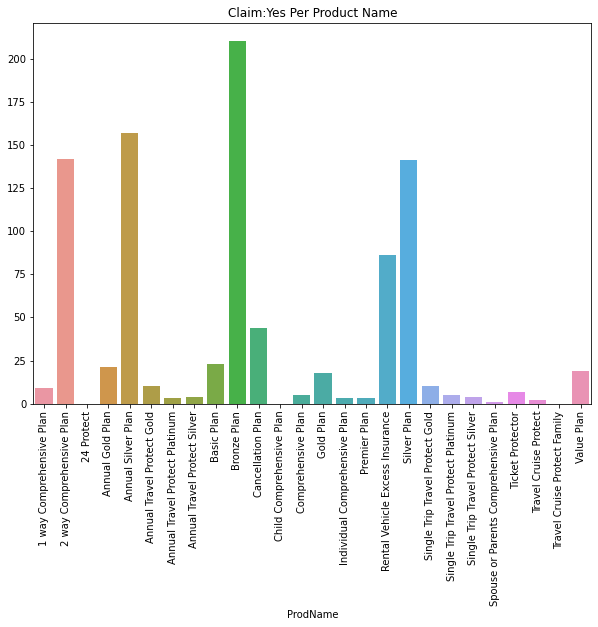

In [16]:
df12 = pd.crosstab(df_travel['ProdName'],df_travel['Claim'],margins=True)
df12.drop(index=['All'],inplace=True)

plt.figure(figsize=(10, 7))
sns.barplot(df12.index, df12.Yes.values)
plt.xticks(rotation=90)
plt.title("Claim:Yes Per Product Name")
plt.show()



<u>Findings:</u>

<span style ="color:Brown"> Bronze plan has highest claim rate as compared to other products.  </span>

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='ProdName'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '1 way Comprehensive Plan'),
  Text(1, 0, '2 way Comprehensive Plan'),
  Text(2, 0, '24 Protect'),
  Text(3, 0, 'Annual Gold Plan'),
  Text(4, 0, 'Annual Silver Plan'),
  Text(5, 0, 'Annual Travel Protect Gold'),
  Text(6, 0, 'Annual Travel Protect Platinum'),
  Text(7, 0, 'Annual Travel Protect Silver'),
  Text(8, 0, 'Basic Plan'),
  Text(9, 0, 'Bronze Plan'),
  Text(10, 0, 'Cancellation Plan'),
  Text(11, 0, 'Child Comprehensive Plan'),
  Text(12, 0, 'Comprehensive Plan'),
  Text(13, 0, 'Gold Plan'),
  Text(14, 0, 'Individual Comprehensive Plan'),
  Text(15, 0, 'Premier Plan'),
  Text(16, 0, 'Rental Vehicle Excess Insurance'),
  Text(17, 0, 'Silver Plan'),
  Text(18, 0, 'Single Trip Travel Protect Gold'),
  Text(19, 0, 'Single Trip Travel Protect Platinum'),
  Text(20, 0, 'Single Trip Travel Protect Silver'),
  Text(21, 0, 'Spouse or Parents Comprehen

Text(0.5, 1.0, 'Claim:No Per Product Name')

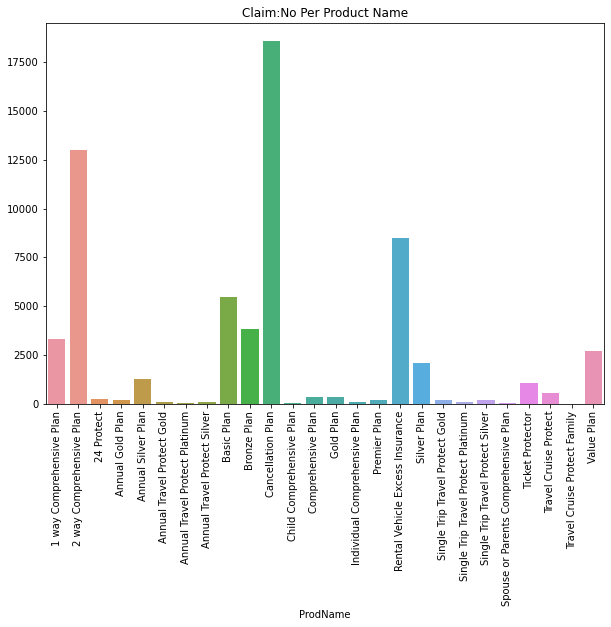

In [17]:
df13 = pd.crosstab(df_travel['ProdName'],df_travel['Claim'],margins=True)
df13.drop(index=['All'],inplace=True)
plt.figure(figsize=(10, 7))
sns.barplot(df13.index, df13.No.values)
plt.xticks(rotation=90)
plt.title("Claim:No Per Product Name")
plt.show()

<u>Findings:</u>

<span style ="color:Brown"> There are many Cancellation Plan which is more than 17500. </span>

<span style ="color:Purple"> <font size="5">To find out which age group has brought more </span>

In [18]:
#Finding the mean age 
mean1 = df_travel['Age'].mean()
print ('Mean Age claiming the insurance: ' + str(mean1))

Mean Age claiming the insurance: 39.969980734611376


(20, 40]      44659
(40, 60]      14397
(60, 80]       2732
(100, 120]      984
(0, 20]         449
(80, 100]       103
Name: age_bracket, dtype: int64

Text(-0.25, 1.2090294665698134, '0.71%')

Text(0.75, 71.02237627514765, '70.52%')

Text(1.75, 23.234737706471275, '22.73%')

Text(2.75, 4.8141837475918265, '4.31%')

Text(3.75, 0.6626504121529861, '0.16%')

Text(4.75, 2.0538641316362947, '1.55%')

Text(0.5, 0, 'Age group')

Text(0, 0.5, 'Claims')

Text(0.5, 1.0, 'Age group and Claim Distribution')

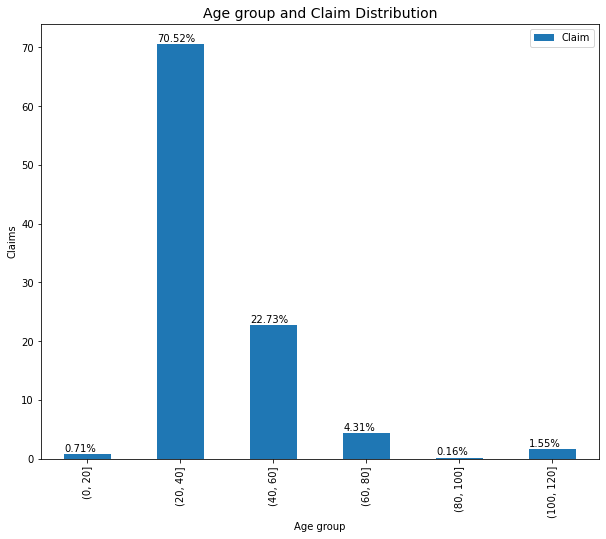

In [19]:
df_travel["age_bracket"] = pd.cut(df_travel['Age'], [0,20,40,60,80,100,120])
df_travel['age_bracket'].value_counts()
d_i = df_travel['age_bracket'].value_counts().index

age_dict = {d_i[0]:"20-40",d_i[1]:"40-60",d_i[2]:"60-80",d_i[3]:"100-120",d_i[4]:"0-20",d_i[5]:"80-1000"}

age_claims = (df_travel.groupby(["age_bracket"])[["Claim"]].count()/len(df_travel)*100)
ax = (df_travel.groupby(["age_bracket"])[["Claim"]].count()/len(df_travel)*100).plot(kind="bar",figsize=(10,8))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+"%", (x,y+h+0.5))
plt.xlabel("Age group")
plt.ylabel("Claims")
plt.title("Age group and Claim Distribution",fontdict={'fontsize':14})
plt.show()

<u>Findings:</u>

<span style ="color:Brown">The above figure shows a histogram depicting the distribution of age.
    
<span style ="color:Brown"> From the histogram, the majorly of people opting for travel insurance are of the age 20-40.
    


<span style ="color:Purple"> <font size="5">To find out the percentage of the insurance plan sold. </span>

([<matplotlib.patches.Wedge at 0x21ba9b2abb0>,
 [Text(0.6264931422740194, 0.9041605735065124, 'Cancellation Plan'),
  Text(-0.9488457664248588, 0.5564995162060992, '2 way Comprehensive Plan'),
  Text(-0.9107289666285687, -0.616905786440409, 'Rental Vehicle Excess Insurance'),
  Text(-0.2698159485843964, -1.0663954960001953, 'Basic Plan'),
  Text(0.26694326003051777, -1.067118220219428, 'Bronze Plan'),
  Text(0.6456878610338853, -0.8905544262500109, '1 way Comprehensive Plan'),
  Text(0.8886109980607353, -0.6483598492546435, 'Value Plan'),
  Text(1.0242611793271585, -0.40110975620562833, 'Silver Plan'),
  Text(1.08161673698305, -0.2002629128873832, 'Annual Silver Plan'),
  Text(1.0983553421569923, -0.0601293801331483, 'Ticket Protector')],
 [Text(0.3417235321494651, 0.49317849463991575, '30.7%'),
  Text(-0.5175522362317411, 0.3035451906578723, '21.7%'),
  Text(-0.4967612545246738, -0.3364940653311322, '14.1%'),
  Text(-0.14717233559148893, -0.581670270545561, '9.0%'),
  Text(0.145605414

Text(0.5, 1.0, 'Type of insurance plans')

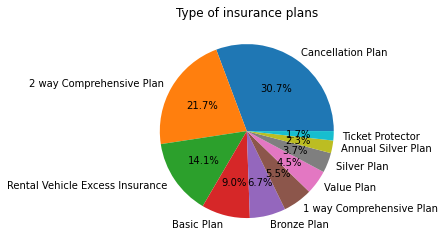

In [20]:
df2=df_travel.groupby(by=["ProdName"]).size().reset_index(name="counts")
df2=df2.nlargest(10,['counts'])
plt.pie(x=df2['counts'],labels=df2['ProdName'],autopct='%1.1f%%')
plt.title('Type of insurance plans')
plt.show()

<u>Findings:</u>

<span style ="color:Brown">There are many people cancelling their insurance plan of 30.7% .</span>  
    

<span style ="color:Purple"> <font size="5">Where are most claims coming from? </span>

([<matplotlib.patches.Wedge at 0x21ba9609c70>,
 [Text(-0.8559211255644156, 0.6909406825571529, 'SINGAPORE'),
  Text(0.4425616752794481, -1.0070447674129728, 'CHINA'),
  Text(0.7752571320475782, -0.7803693863865778, 'AUSTRALIA'),
  Text(0.9856255302701974, -0.4884079381824097, 'UNITED STATES'),
  Text(1.0878163009590414, -0.163265720124552, 'THAILAND')],
 [Text(-0.46686606848968115, 0.37687673594026516, '78.4%'),
  Text(0.2413972774251535, -0.5492971458616215, '6.4%'),
  Text(0.42286752657140625, -0.4256560289381333, '5.3%'),
  Text(0.5376139256019258, -0.266404329917678, '5.2%'),
  Text(0.5933543459776589, -0.08905402915884654, '4.7%')])

Text(0.5, 1.0, 'Top 5 countries where insured are raising claim requests')

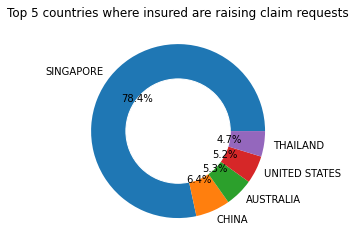

In [21]:
df6= df5.groupby(by=["Destination"]).size().reset_index(name="counts")
df7=df6.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df7['counts'], labels=df7['Destination'], autopct='%1.1f%%')
plt.title('Top 5 countries where insured are raising claim requests')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


<u>Findings:</u>

<span style ="color:Brown">The highest number of claims comes from Singapore of 78.4% . </span>
    

<span style ="color:Purple"> <font size="5">Singapore being the top country claiming the insurance, let's explore more on this country claim count </span>

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='Agency', ylabel='count'>

Text(0.5, 1.0, 'Singapore agnecy claim count')

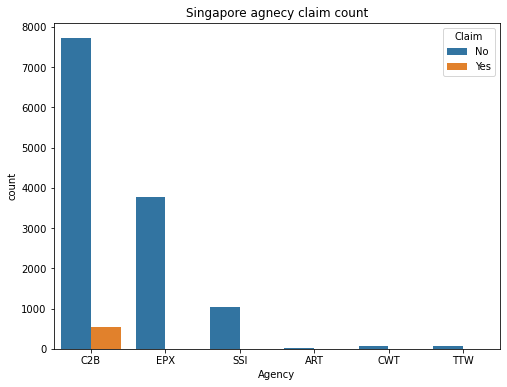

In [22]:
top_country = df_travel[df_travel['Destination']=='SINGAPORE']
plt.figure(figsize=(8,6))
sns.countplot('Agency', data=top_country, hue='Claim')
plt.title('Singapore agnecy claim count')
plt.show()

<u>Findings:</u>

<span style ="color:Brown"> C2B Agency has the highest claim count in singapore. </span>
    

<span style ="color:Purple"> <font size="5"> Average Net Sales vs Products</span>

Text(0.5, 1.0, 'Top 5 Products with highest average revenue')

Text(0.5, 0, 'Revenue')

Text(0, 0.5, 'Product Name')

(0.0, 400.0)

Text(175.59651162790698, -0.04999999999999999, '200')

Text(193.85130709768094, 0.95, '218')

Text(221.9405, 1.95, '246')

Text(307.20943396226414, 2.95, '332')

Text(311.60231958762887, 3.95, '336')

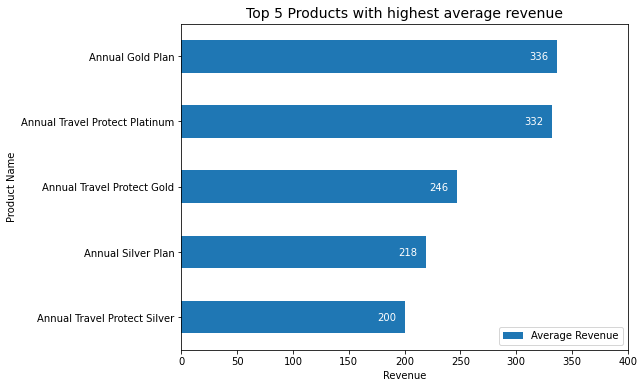

In [23]:
net_sales_mean = df_travel.groupby(["ProdName"])[["NetSales"]].mean().sort_values("NetSales", ascending = False).iloc[:5]

#plotting top 5 products by mean of net sales

ax = net_sales_mean.sort_values('NetSales',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest average revenue',fontdict={'fontsize':14})
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.legend(['Average Revenue'])
plt.xlim((0,400))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w)), (x+w-25,y+.2),color='white',)


plt.show()

<u>Findings:</u>

<span style ="color:Brown"> Annual Gold Plan has the highest average revenue of 336.</span>


<span style ="color:Purple"> <font size="5">Top 5 Products with highest revenue combine</span>

,NetSales
ProdName,
2 way Comprehensive Plan,559369.00
Cancellation Plan,492134.00
Rental Vehicle Excess Insurance,369289.80
Annual Silver Plan,311425.41
Basic Plan,144903.00


<AxesSubplot:ylabel='ProdName'>

Text(0.5, 1.0, 'Top 5 Products with highest Total Revenue')

Text(0.5, 0, 'Revenue')

Text(0, 0.5, 'Product Name')

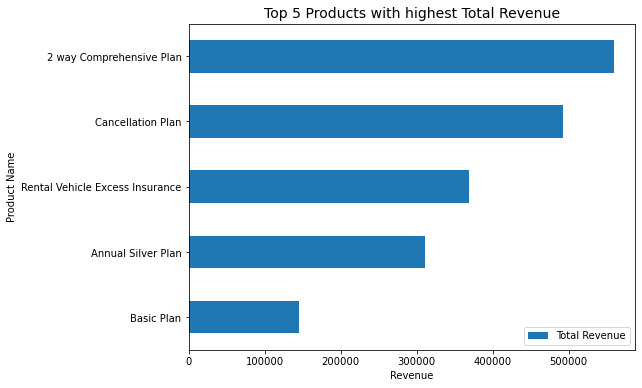

In [24]:
#top 5 products by sum of highest revenue combine

net_sales_top5_sum = df_travel.groupby(["ProdName"])[["NetSales"]].sum().sort_values("NetSales", ascending = False).iloc[:5]
net_sales_top5_sum

#plotting top 5 products by sum of net sales
net_sales_top5_sum.sort_values('NetSales',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Revenue',fontdict={'fontsize':14})
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.legend(['Total Revenue'])

plt.show()

<u>Findings:</u>

<span style ="color:Purple"><u>2 way Comperhensive Plan</u> <span style ="color:brown">has the highest total revenue.</span>
    

<span style ="color:Purple"> <font size="5">Total commision for top 5 products</span>

<AxesSubplot:ylabel='ProdName'>

Text(0.5, 1.0, 'Top 5 Products with highest Total commission')

Text(0.5, 0, 'Commision')

Text(0, 0.5, 'Product Name')

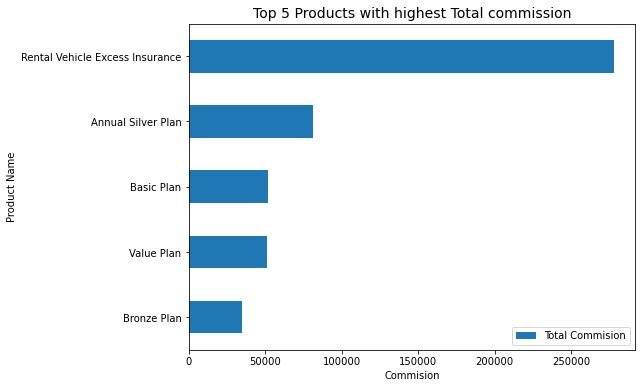

In [25]:
# Plotting for Total commision for top 5 products
comm_top5_sum = df_travel.groupby(["ProdName",])[["Commission"]].sum().sort_values("Commission",ascending=False)[:5]

comm_top5_sum.sort_values('Commission',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total commission',fontdict={'fontsize':14})
plt.xlabel('Commision')
plt.ylabel('Product Name')
plt.legend(['Total Commision'])
plt.show()

<u>Findings:</u>

<span style ="color:Brown"> Rental Vehicle Excess Insurance has overall highest commission.</span>

<span style ="color:Purple"> <font size="5">Total duration for top 5 products </span>

<AxesSubplot:ylabel='ProdName'>

Text(0.5, 1.0, 'Top 5 Products with highest Total Duration')

Text(0.5, 0, 'Duration')

Text(0, 0.5, 'Product Name')

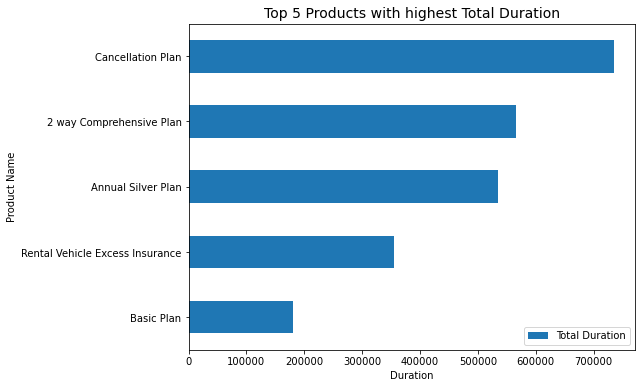

In [26]:
# Plotting for Total duration for top 5 products
comm_top5_sum = df_travel.groupby(["ProdName",])[["Duration"]].sum().sort_values("Duration",ascending=False)[:5]

comm_top5_sum.sort_values('Duration',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Duration',fontdict={'fontsize':14})
plt.xlabel('Duration')
plt.ylabel('Product Name')
plt.legend(['Total Duration'])
plt.show()

<u>Findings:</u>

<span style ="color:Brown"> Cancellation plan has the highest total duration.</span>

<span style ="color:Purple"> <font size="5">Handing Missing data</span>

In [27]:
df_travel.isnull()

,Agency,AgencyType,DistChannel,ProdName,Claim,Duration,Destination,NetSales,Commission,Gender,Age,age_bracket
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
63321,False,False,False,False,False,False,False,False,False,False,False,False
63322,False,False,False,False,False,False,False,False,False,False,False,False
63323,False,False,False,False,False,False,False,False,False,False,False,False
63324,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
np.random.seed(0) # This must be in the same cell

df_null = df_travel.mask(np.random.random(df_travel.shape) < .1) # randomly masking 10% of values
df_null

,Agency,AgencyType,DistChannel,ProdName,Claim,Duration,Destination,NetSales,Commission,Gender,Age,age_bracket
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,-29.0,9.57,F,81.0,"(80.0, 100.0]"
1,CBH,Travel Agency,NaN,NaN,NaN,186.0,MALAYSIA,-29.0,9.57,F,71.0,"(60.0, 80.0]"
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65.0,AUSTRALIA,-49.5,29.70,NaN,NaN,"(20.0, 40.0]"
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60.0,AUSTRALIA,NaN,23.76,NaN,32.0,"(20.0, 40.0]"
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79.0,ITALY,-19.8,11.88,NaN,41.0,"(40.0, 60.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111.0,JAPAN,35.0,12.25,M,31.0,NaN
63322,JZI,Airlines,NaN,Basic Plan,No,58.0,CHINA,40.0,14.00,F,40.0,"(20.0, 40.0]"
63323,JZI,Airlines,Online,Basic Plan,No,2.0,MALAYSIA,18.0,6.30,M,57.0,"(40.0, 60.0]"
63324,JZI,Airlines,Online,Basic Plan,No,3.0,VIET NAM,18.0,6.30,M,63.0,"(60.0, 80.0]"


In [29]:
df_travel.isnull().sum()

Agency             0
AgencyType         0
DistChannel        0
ProdName           0
Claim              0
Duration           0
Destination        0
NetSales           0
Commission         0
Gender         45107
Age                0
age_bracket        2
dtype: int64

<u>Findings:</u>

<span style ="color:Brown"> There are a lot of missing values in the gender column so we will remove it.</span>

In [30]:
df_travel=df_travel.drop(['Gender'], axis=1)
df_travel.head()

,Agency,AgencyType,DistChannel,ProdName,Claim,Duration,Destination,NetSales,Commission,Age,age_bracket
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81,"(80, 100]"
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71,"(60, 80]"
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32,"(20, 40]"
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32,"(20, 40]"
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41,"(40, 60]"


<u>Findings:</u>

<span style ="color:Brown"> The gender column has been removed </span>
    

<span style ="color:Purple"> <font size="5">Map Categorial to Numeric for Model Building</span>

In [31]:
df_travel.head()

,Agency,AgencyType,DistChannel,ProdName,Claim,Duration,Destination,NetSales,Commission,Age,age_bracket
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81,"(80, 100]"
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71,"(60, 80]"
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32,"(20, 40]"
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32,"(20, 40]"
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41,"(40, 60]"


In [32]:
#encode test data

mapping = { 'DistChannel': {'Offline': 1, 'Online': 0 }, }

 
df_travel['DistChannel'] = df_travel['DistChannel'].map(mapping['DistChannel'])

In [33]:
df_travel['DistChannel'].value_counts()
df_travel['DistChannel'].replace('3+',3,inplace=True)

0    62219
1     1107
Name: DistChannel, dtype: int64

In [34]:
df_travel.head()

,Agency,AgencyType,DistChannel,ProdName,Claim,Duration,Destination,NetSales,Commission,Age,age_bracket
0,CBH,Travel Agency,1,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81,"(80, 100]"
1,CBH,Travel Agency,1,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71,"(60, 80]"
2,CWT,Travel Agency,0,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32,"(20, 40]"
3,CWT,Travel Agency,0,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32,"(20, 40]"
4,CWT,Travel Agency,0,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41,"(40, 60]"


<span style ="color:Purple"> <font size="5">Find Correlationship </span>

<AxesSubplot:>

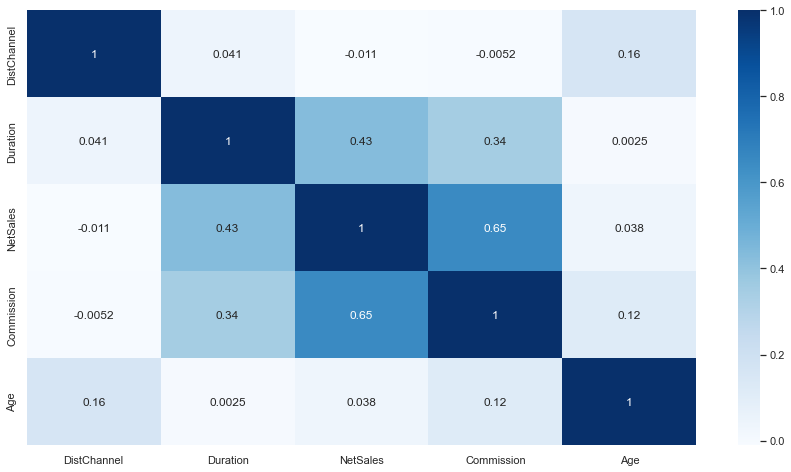

In [35]:
#To analyse the correlation between the variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_travel.corr(),cmap='Blues', annot = True)

In [36]:
from sklearn import datasets

In [37]:
targets = df_travel.Commission
targets.head()

0     9.57
1     9.57
2    29.70
3    23.76
4    11.88
Name: Commission, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression  # import
from sklearn.metrics import mean_squared_error
X = df_travel[["Commission"]] # this part is for skeleton structure
y = targets
lm = LinearRegression()  # instantiate a linear regression model
lm.fit(X, y)    # fit the model on predictors (2D object) and target (1D object)
predictions = lm.predict(X)       # use fitted model to predict on the training data (we should predict on new data to be accurate)
mean_squared_error(y, predictions)   # compare true values with predictions using a performance metric

LinearRegression()

4.1026509669595916e-26

In [39]:
X = df_travel[["Commission"]]   # Why not df['bmi']? Because sklearn needs 2D object for all X its models fits on
y = targets

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Comission')

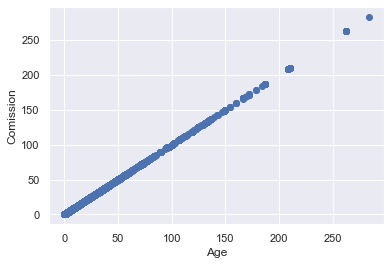

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
# Let's plot the relationship between X and y
# We see a good visual indicator for a linear relationship
plt.scatter(X,y)
plt.xlabel('Age')
plt.ylabel('Comission')

<u>Findings:</u>

<span style ="color:Brown"> The higher the age of the person buying the insurance, the higher the commission that the agencies will earn.</span>
    

<span style ="color:Purple"> <font size="5">Implementing the fitting process </span>


In [41]:
#Let's try fitting the data into a linear model

# Step 1 - Import the library
from sklearn.linear_model import LinearRegression

# Step 2 - create an instance of model
lm = LinearRegression()

# Step 3 - fit the variables into the model
# Notice that the fit method is ran in-place, the result need not be assigned to a new variable
lm.fit(X, y)

# Step 4 - use the model to predict your dependent variables
predictions = lm.predict(X)

LinearRegression()

<span style ="color:Purple"> <font size="5">Visualizing results </span>


Text(0.5, 0, 'Age')

Text(0, 0.5, 'Commission')

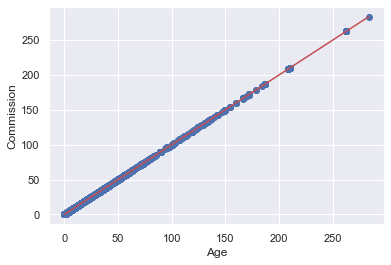

In [42]:
plt.scatter(X,y)
plt.xlabel('Age')
plt.ylabel('Commission')

# only need to prepare (x,y) coords of 2 endpoints to plot the predicted line
x = np.array([X.min(),X.max()]) #min and maximum of the X which is BMI
y_pred = x * lm.coef_ + lm.intercept_ #y = mx +c
#x is the independent variable, y is the dependent variable.
plt.plot(x,y_pred,c='r')

<span style ="color:Purple"> <font size="5">Actual vs Predicted plot </span>
- perfect prediction is straight line 45 degrees
- Used to check for patterns that cannot be modelled by the current data
    - eg. curves in the graph
    - eg. Commission < 0  being underestimated and < 250 being overestimated

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'Predicted Commission')

Text(0, 0.5, 'Actual Commission')

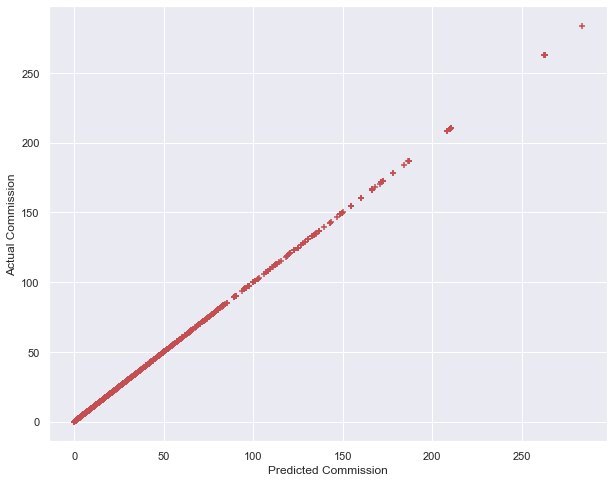

In [43]:
# Plot our predictions
plt.figure(figsize=(10,8))
plt.scatter(predictions, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Commission")
plt.ylabel("Actual Commission")
plt.show()

In [44]:
# Sklearn.metrics provides us a function to calculate MSE easily
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y, predictions))

MSE: 4.1026509669595916e-26


In [45]:
from sklearn.metrics import r2_score

print("R-squared:", r2_score(y, predictions))

R-squared: 1.0


MSE: 386.7142270209896
R-squared: 0.014006314774723139
Adjusted R-squared: 0.013990744158760449
Coefficients:  [0.16721222]
Intercept:  3.126522627349951


(array([0.16721222]), 3.126522627349951)

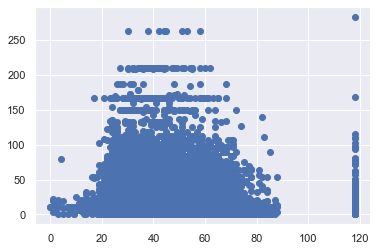

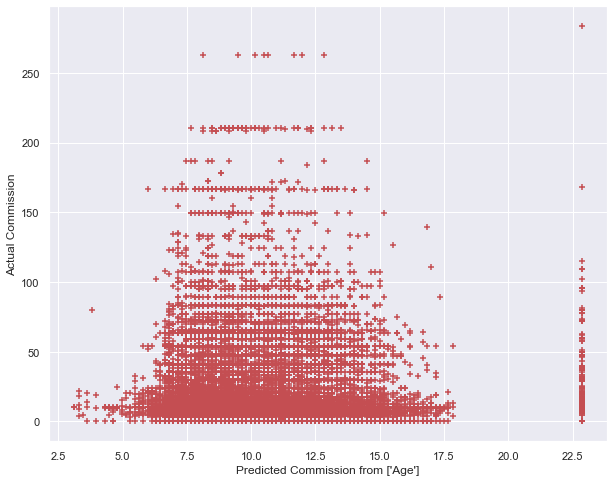

In [46]:
# Select X and y
X = df_travel[["Age"]]
y = df_travel.Commission

plt.scatter(X,y)

def train_predict(X,y):
    lm = LinearRegression()
    lm.fit(X, y)
    predictions = lm.predict(X)
    # Plot our predictions
    plt.figure(figsize=(10,8))
    plt.scatter(predictions, y, s=30, c='r', marker='+')
    plt.xlabel(f"Predicted Commission from {X.columns.values}")
    plt.ylabel("Actual Commission")

    

    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    adj_r2 = 1 - (len(y)-1)/(len(y)-len(X.columns)-1)*(1 - r2)
    
    print("MSE:", mse)
    print("R-squared:", r2)
    print("Adjusted R-squared:", adj_r2)

    
    print("Coefficients: ",lm.coef_)
    print("Intercept: ",lm.intercept_)
    
    return lm.coef_,lm.intercept_

train_predict(X,y)

<AxesSubplot:xlabel='Age', ylabel='Commission'>

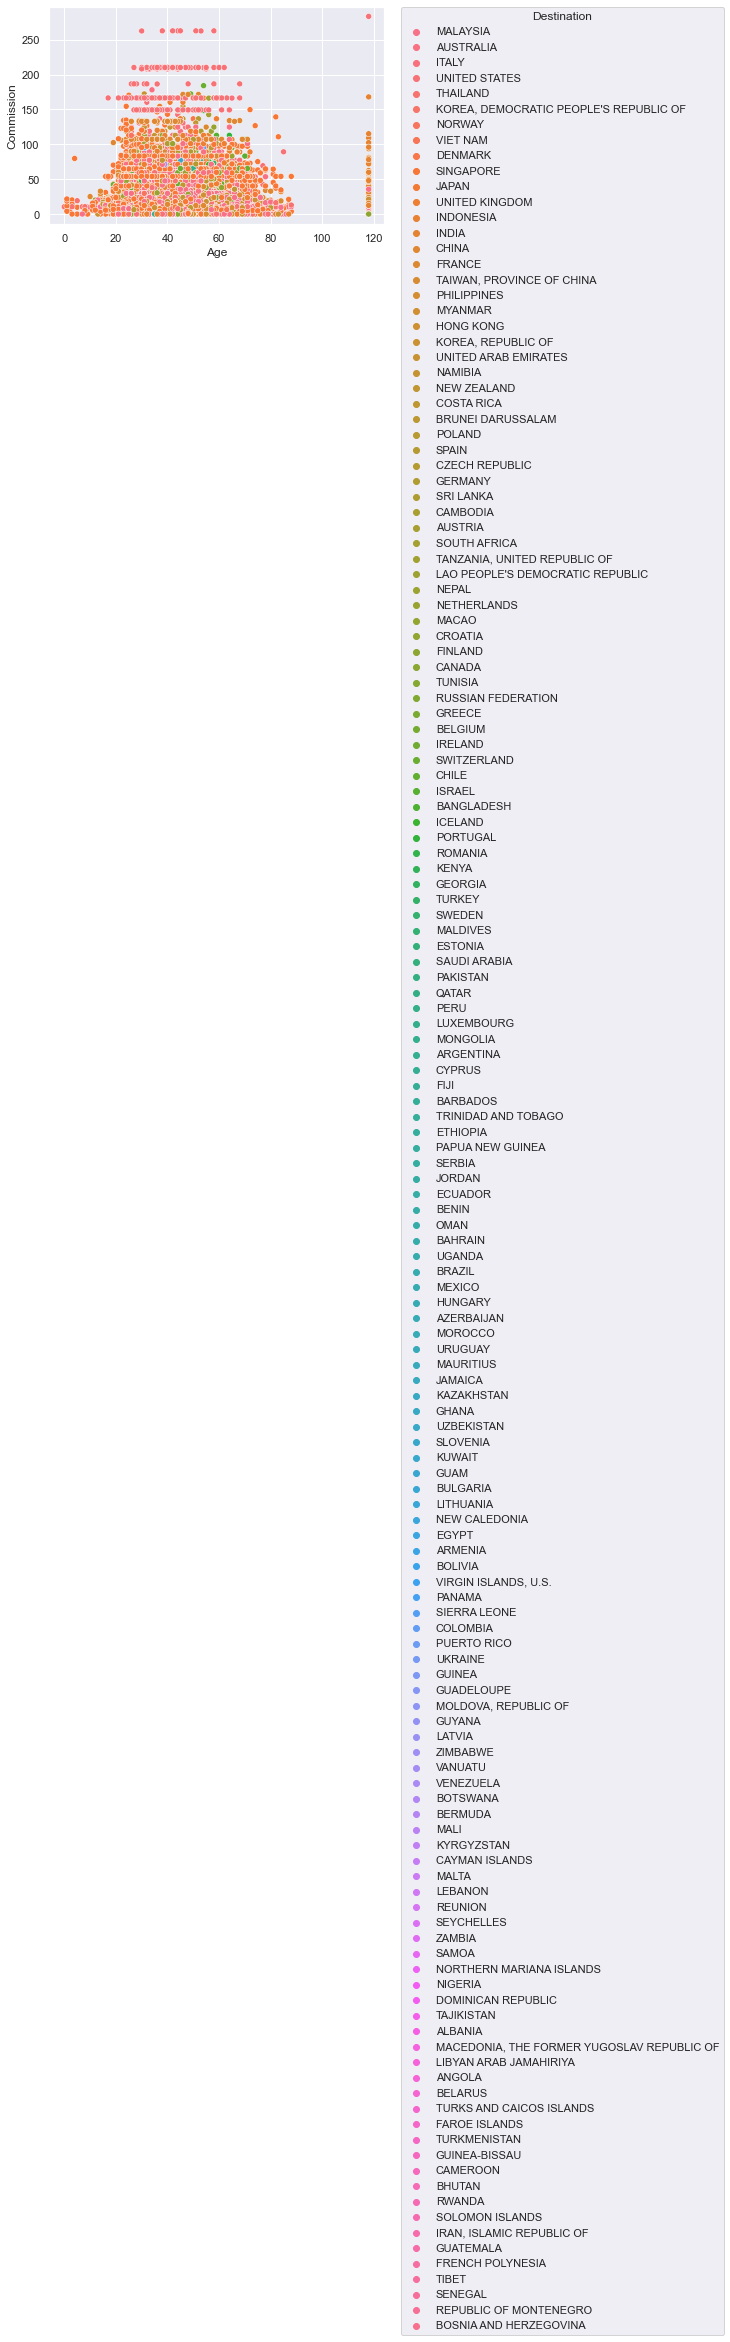

In [47]:
#Hue can be used to group to multiple data variable and show the dependency of the passed data values are to be plotted
#Hue: variables that define the subsets of the data
import matplotlib.pyplot as plt


sns.scatterplot(x='Age',y='Commission',data=df_travel,hue='Destination')
plt.legend(bbox_to_anchor=(1.05, 1), title="Destination",loc=2, borderaxespad=0.)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Commission'>

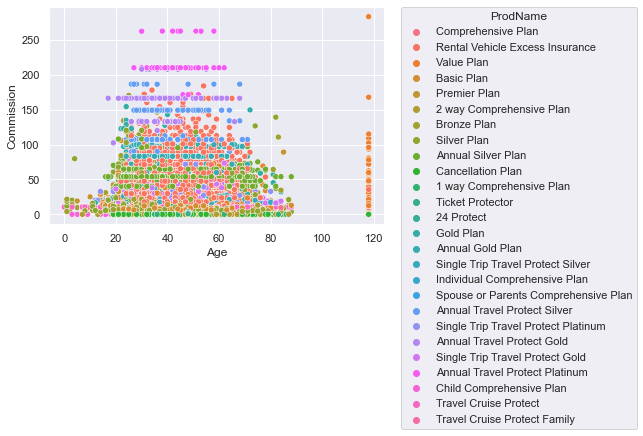

In [48]:
sns.scatterplot(x='Age',y='Commission',data=df_travel,hue='ProdName')
plt.legend(bbox_to_anchor=(1.05, 1), title="ProdName",  loc=2, borderaxespad=0.)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Commission'>

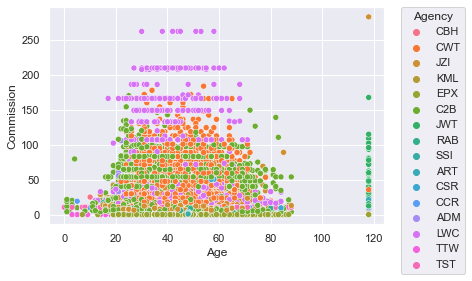

In [49]:
sns.scatterplot(x='Age',y='Commission',data=df_travel,hue='Agency')
plt.legend(bbox_to_anchor=(1.05, 1),title="Agency", loc=2, borderaxespad=0.)
plt.show()

<u>Findings:</u>

<span style ="color:Brown"> THe higher the age of the person buys , the higher commission earned for Agency/ProdName/Destination .</span>
    

<span style ="color:Purple"> <font size="5">Use KNN on the Travel Insurance dataset</span>

In [50]:
#Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

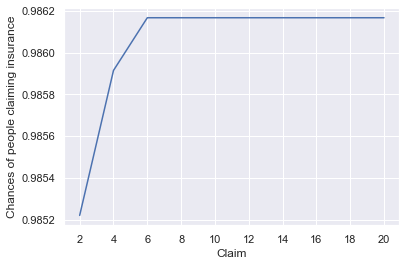

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
loan = pd.read_csv('Travel.csv')

loan.Claim = loan.Claim.map({'Yes':1,"No":0})
y = loan.pop('Claim') #to pop out the last column
X = loan.select_dtypes('number') #to select data types with number
X = X.fillna(X.mean()) #to fill na with mean

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)


scores = []

for n in range(2,20+1,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    _ = knn.fit(X_train, y_train) # _ this is to mute the output
    y_pred_class = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_class))
    
_ = plt.plot(scores)                                       #_ to mute the outputs
_ = plt.xticks(ticks=range(10),labels=range(2,20+1,2))     #_ to mute the outputs
_ = plt.xlabel('Claim')
_ = plt.ylabel('Chances of people claiming insurance')

<u>Findings:</u>

<span style ="color:Brown"> As the claim number increase, there are more chances of people claiming the insurance</span>
    

<span style ="color:Purple"> <font size="5"> BASE MODEL SELECTION </span>

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

<span style ="color:Pink"> <font size="5"> Decision tree model evaluation </span>

In [54]:
y = df_travel.Claim=='No' #to make it true or false
X = df_travel.drop('Claim',axis=1)

In [55]:
X = X.select_dtypes('number') # we see some NaN, to check with df.info()

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DistChannel  63326 non-null  int64  
 1   Duration     63326 non-null  int64  
 2   NetSales     63326 non-null  float64
 3   Commission   63326 non-null  float64
 4   Age          63326 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 2.4 MB


In [56]:
X.NetSales.unique()  
X.Duration.unique()

array([-29.  , -49.5 , -39.6 , ...,   1.74, 388.8 ,  11.58])

array([ 186,   65,   60,   79,   66,   47,   63,   57,   33,    1,   53,
          5,   39,    6,   48,   11,    3,   14,  136,   12,    7,  190,
        364,   29,   28,  153,    4,   54,   24,    9,   45,   35,    8,
        183,   36,   38,   13,   27,   16,   19,   18,  189,  105,   23,
         15,  180,   90,   91,    2,   17,   10,  279,   92,   22,   64,
         37,   31,   41,  126,   50,   55,  181,   76,   43,   56,   20,
        164,   26,  152,   30,   32,  111,   34,  201,   62,   81,   42,
         49,  124,  118,   52,   59,   73,   21,   25,   94,   46,   82,
         40,  130,  388,  369,  368,  114,   85,  133,  103,  110,  147,
        306,   75,   83,   70,  104,  131,  202,  179,   61,  365,  374,
        386,   86,  100,  244,   99,  108,  277,  107,   87,  276,  123,
        122,  148,  278,  204,  112,   78,   97,  142,  351,   68,  163,
        197,   95,  125,   51,   69,   44,   71,   72,  178,   80,  150,
         74,  171,  127,  160,  168,  158,  325,  1

In [57]:
from sklearn.impute import SimpleImputer # for filling missing values, can only use for numeric values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

si = SimpleImputer(strategy='most_frequent')  #strategy to use most frequent value along each column
X_train = si.fit_transform(X_train)
si.statistics_ # check fitted fill-value for each column (focus on last 2)

array([ 0.,  6., 20.,  0., 36.])

In [58]:
# check no nans after imputing. any nan in numpy array will cause sum to be nan, any non-nan sum is fine
X_train.sum() 

8678295.35

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# use the transformer fit from training set to apply to test set (prevent data leakage)
X_test = si.transform(X_test) 
y_preds = dt.predict(X_test)

DecisionTreeClassifier()

In [60]:
# initialize decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

DecisionTreeClassifier()

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_preds)

0.9692186266771902

In [62]:
scores = {}
for depth in range(2,18+1,4):
    dt = DecisionTreeClassifier(max_depth=depth) #increasing the number of splits and therefore increasing the complexity
    dt.fit(X_train, y_train)

    # use the transformer fit from training set to apply to test set (prevent data leakage)
    X_test = si.transform(X_test) 
    y_preds = dt.predict(X_test)
    scores[depth] = accuracy_score(y_test,y_preds) #the score decreases because it starts to overfit and not able to generalize the data properly on the test data

score_table = pd.Series(data=scores)
score_table
    

DecisionTreeClassifier(max_depth=2)

DecisionTreeClassifier(max_depth=6)

DecisionTreeClassifier(max_depth=10)

DecisionTreeClassifier(max_depth=14)

DecisionTreeClassifier(max_depth=18)

2     0.983425
6     0.982636
10    0.980268
14    0.975533
18    0.973954
dtype: float64

<span style ="color:Pink"> <font size="5"> Logistic Regression </span>

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#initialize logistic regression model

logreg = LogisticRegression()
#fit X_train and y_train
logreg.fit(X_train,y_train)

#use model to predict X_test
y_pred = logreg.predict(X_test)

#compare predictions to y_test
print("Accuracy:", accuracy_score(y_test, y_pred) *100)

LogisticRegression()

Accuracy: 98.26361483820048


<span style ="color:Pink"> <font size="5"> K-Nearest Neighbour</span>

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

#compare predictions to y_test
print("Accuracy:", accuracy_score(y_test, y_pred_knn) *100)

Accuracy: 98.26361483820048


<span style ="color:pink"> <font size="5">Confusion Matrix </span>

Accuracy Score: 0.9826361483820047


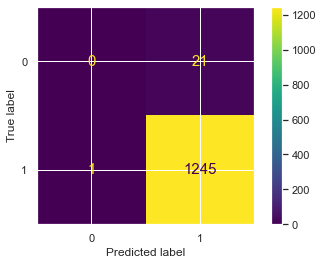

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print (f'Accuracy Score: {accuracy_score(y_test,y_pred)}')

font = {'size'   : 15}
plt.rc('font', **font) 

cm = confusion_matrix(y_test, y_pred) 

cm_display = ConfusionMatrixDisplay(cm).plot()

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

LogisticRegression()

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#initialize logistic regression model

logreg = LogisticRegression()

#fit X_train and y_train
logreg.fit(X_train,y_train)

#use model to predict X_test
y_pred = logreg.predict(X_test)

#compare predictions to y_test
print("Accuracy:", accuracy_score(y_test, y_pred) *100)

LogisticRegression()

Accuracy: 98.26361483820048


Text(0.5, 1.0, 'ROC')

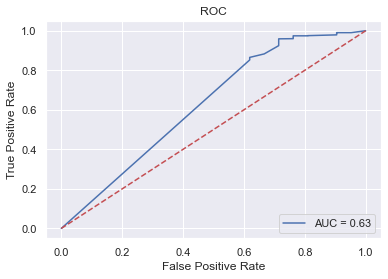

AUC score:  0.6281625009554384


In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

y_score = dt.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()

plt.plot([0,1],[0,1],'r--')
plt.title('ROC')
plt.show()


print('AUC score: ',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])) 

In [69]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape
from sklearn.linear_model import LogisticRegression
LoR = LogisticRegression(solver = "liblinear")
LoR_model = LoR.fit(X_train,y_train)
LoR_model
y_pred_loj = LoR_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_score(y_test, y_pred_loj)

((62059, 5), (1267, 5))

((62059,), (1267,))

LogisticRegression(solver='liblinear')

0.9826361483820047

<span style ="color:Purple"> <font size="5">Use GridSearch to Improve the Model</span>
- It can be seen that our accuracy score is at 0.982.
- Now, using GridSearch, find better parameters for this Decision Tree to reduce overfitting and improve the accuracy score.

In [70]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# Create the parameters list we wish to tune.
parameters = {
              'max_depth':[1, 2, 3, 4, 5, 6],
              'min_samples_leaf':[2, 3, 4], 
              'min_samples_split':[10, 20, 30]
             }


# Make a accuracy scoring object.
from sklearn.metrics import accuracy_score
scorer = make_scorer(accuracy_score)

# Perform grid search on the classifier using 'scorer' as the scoring method.
# Create the object.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=5,n_jobs=-1) # n_jobs refer to the processor, -1 means all processor used, speed of computation if used all


# Fit the grid search object to the training data and find the optimal parameters.
# Fit the data
grid_fit = grid_obj.fit(X_train, y_train)

# View results of GridSearchCV in DataFrame
pd.concat([pd.DataFrame(grid_fit.cv_results_["params"]),   
           pd.DataFrame(grid_fit.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).head()


# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)


# Make predictions using the new model.
best_test_predictions = best_clf.predict(X_test)

accuracy_score(y_test,best_test_predictions)

,max_depth,min_samples_leaf,min_samples_split,Accuracy
0,1,2,10,0.985401
1,1,2,20,0.985401
2,1,2,30,0.985401
3,1,3,10,0.985401
4,1,3,20,0.985401


DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

0.9834254143646409

<u>Findings:</u>

<span style ="color:Brown"> After the GridSearch, the decision tree accuracy has improved from 0.982 to 0.983</span>

<span style ="color:Purple"> <font size="5">Optimize the Hyperparameter Value </span>

In [71]:
# Load gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_params = {"n_neighbors": np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, y_train)
print("Best score: " + str(knn_cv.best_score_))
print("Best params: " + str(knn_cv.best_params_))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

Best score: 0.9854009896255734
Best params: {'n_neighbors': 13}


<span style ="color:Purple"> <font size="5">Insert the Best Hyperparameter via Gridsearch and Cross Validation </span>


In [72]:
knn = KNeighborsClassifier(5)
knn_tuned = knn.fit(X_test, y_test)
knn_tuned.score(X_train, y_train)

0.9850303743212104

In [73]:
y_pred_tuned = knn_tuned.predict(X_test)

<AxesSubplot:>

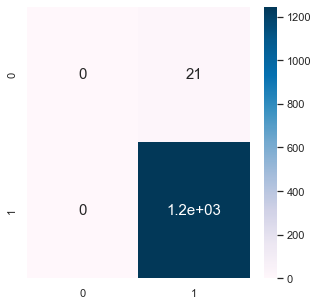

In [74]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

<span style ="color:Purple"> <font size="5">Limitations</span>


<span style ="color:Brown"> Many columns had a large percentage of missing values - more values need to be provided in order to produce more accurate predictions.</span>


<span style ="color:Purple"> <font size="5"> Suggestions of improvement of dataset</span>

<span style ="color:Brown">we can remake model like random forest or combine a few classifier model as one.</span>

<span style ="color:Purple"> <font size="5">Summary</span>


1. From the data exploratory observation, below are the findings:
    - Airlines have higher claim rate whereas more than 90% of insurances in train agency are not claimed.
    - The top agency is C2B with 61.1% of people who insured claim requests as compared to other agency.
    - According to the chart above, CWT has the highest unlclaim rate of 99.0%.
    - The highest number of claims comes from Singapore of 78.4% .
    - Rental Vehicle Excess Insurance has overall highest commission.
    - C2B is the highest agencies of insurance sold with 61.1%
    
    
2. ML algorithms findings:
    -  Apply Logistic Regression, Decision Tree and KNN algorithm to address the issue.
    - For Model Accuracy, Logistic Regression performed better with 0.9826 as compared to Decision Tree with 0.9834 
    - After GridSearch, the decision tree accuracy has improved from 0.982 to 0.983.
    - Logistic Regression and Decision Tree are quite similiar in terms of result.


<u>Refences: (For dataset)</u>

<span style ="color:orange">https://www.kaggle.com/datasets/mhdzahier/travel-insurance/code </span>
    
